## 1-Importing Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score


## 2-Loading Dataset

In [2]:
df = pd.read_csv('/content/Wholesale customers data.csv')
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## 3-Initial Data Exploration

In [3]:
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


np.int64(0)

## 4-Preprocessing

In [5]:
df = df.drop_duplicates()
df_numerical = df.drop(['Channel', 'Region'], axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numerical)


<bound method NDFrame.head of      Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4  

## 5-PCA for Dimensionality Reduction

Explained variance ratio: [0.44082893 0.283764  ]


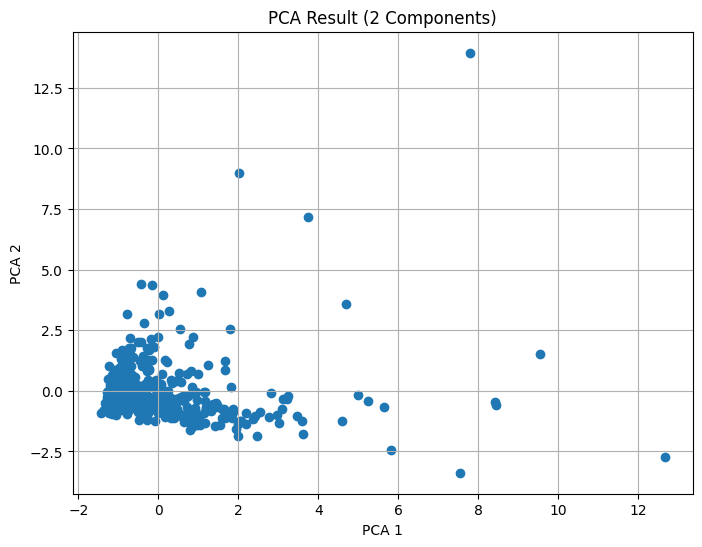

In [6]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
print("Explained variance ratio:", pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Result (2 Components)')
plt.grid(True)
plt.show()


## 6-K-Means Clustering + Elbow Method

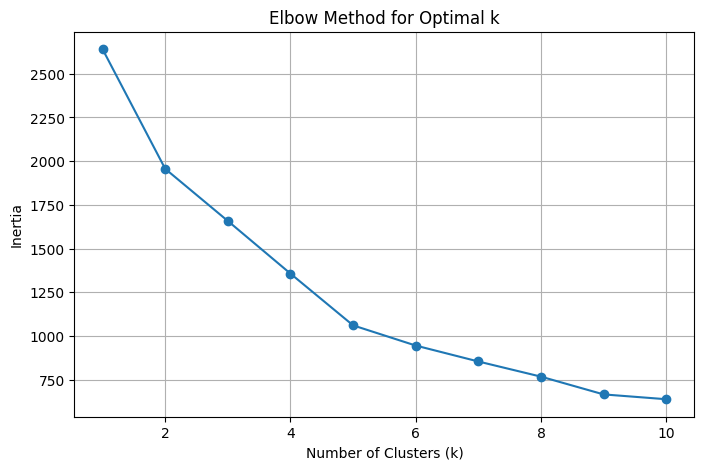

In [12]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


##  7-Apply Clustering Algorithms

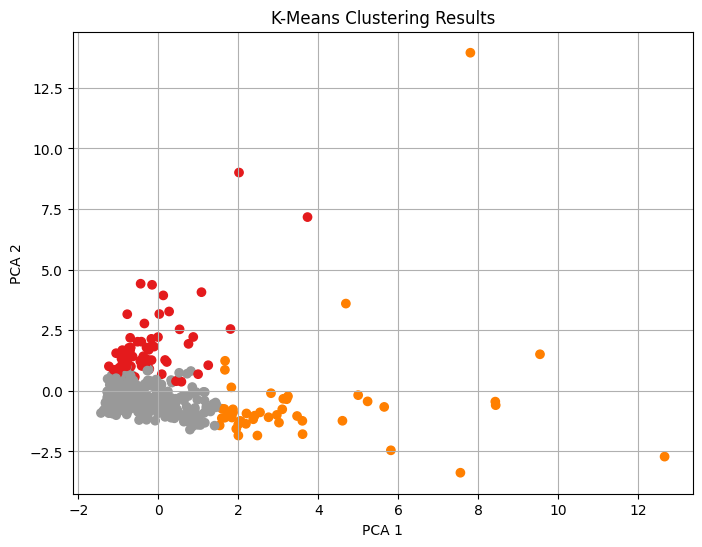

In [8]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='Set1')
plt.title('K-Means Clustering Results')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


## 8- DBSCAN

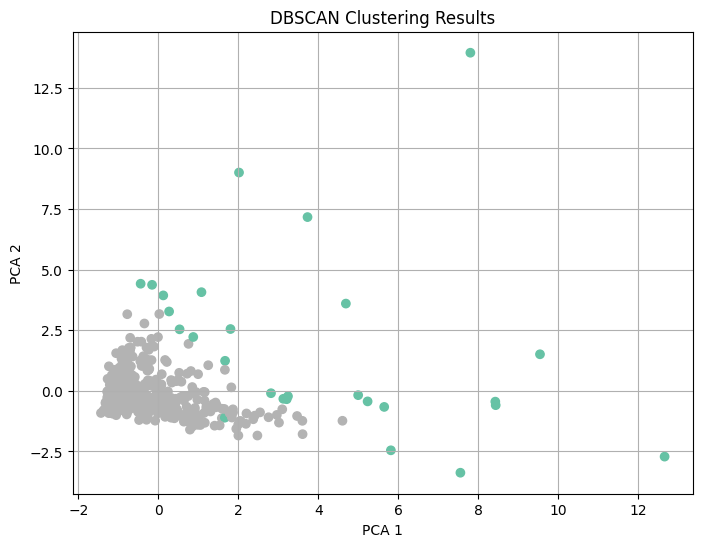

In [9]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=db_labels, cmap='Set2')
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


## 8-Evaluation

In [11]:
print("K-Means Silhouette Score:", silhouette_score(scaled_data, kmeans_labels))
print("K-Means Davies-Bouldin Index:", davies_bouldin_score(scaled_data, kmeans_labels))
if len(set(db_labels)) > 1:
    print("DBSCAN Silhouette Score:", silhouette_score(scaled_data, db_labels))
    print("DBSCAN Davies-Bouldin Index:", davies_bouldin_score(scaled_data, db_labels))
else:
    print("DBSCAN formed only one cluster or failed to cluster.")


K-Means Silhouette Score: 0.3916016573908254
K-Means Davies-Bouldin Index: 1.2494010354240845
DBSCAN Silhouette Score: 0.6602347586576692
DBSCAN Davies-Bouldin Index: 1.480843288827392
